<a href="https://colab.research.google.com/github/dorotaoni/uczenie_maszynowe/blob/c1/zaj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install scikit-plot

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LinearRegression, LogisticRegression
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import scikitplot as skplt
from sklearn.metrics import confusion_matrix

In [11]:
data = pd.read_csv('/content/creditcard.csv')

In [7]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [12]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
X = data.drop(columns='Class')
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
print('Accuracy ', accuracy)
print('Precision ', precision)
print('Recall ', recall)

Accuracy  0.9985955549313578
Precision  1.0
Recall  0.11764705882352941


In [ ]:
confusion_matrix(y_test, y_pred)

array([[85307,     0],
       [  120,    16]])

In [14]:
oversampler = RandomOverSampler(random_state=42)

X_oversamp, y_oversamp = oversampler.fit_resample(X_train, y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_oversamp, y_oversamp)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
print('Accuracy ', accuracy)
print('Precision ', precision)
print('Recall ', recall)

In [ ]:
undersampler = RandomUnderSampler(random_state=42)

X_undersamp, y_undersamp = undersampler.fit_resample(X_train, y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_undersamp, y_undersamp)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
print('Accuracy ', accuracy)
print('Precision ', precision)
print('Recall ', recall)

In [33]:
model = KNeighborsClassifier(n_neighbors=3)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = make_pipeline(over, under, model)


In [36]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     85307
           1       0.01      0.51      0.02       136

    accuracy                           0.93     85443
   macro avg       0.51      0.72      0.49     85443
weighted avg       1.00      0.93      0.96     85443



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

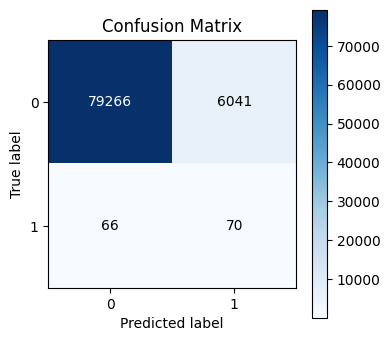

In [38]:
cm = confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(
y_test,
y_pred,
figsize=(4, 4))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.64      0.65      0.65       136

    accuracy                           1.00     85443
   macro avg       0.82      0.83      0.82     85443
weighted avg       1.00      1.00      1.00     85443



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

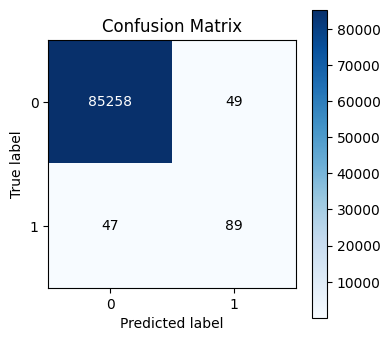

In [50]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(
y_test,
y_pred,
figsize=(4, 4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.76      0.56      0.64       136

    accuracy                           1.00     85443
   macro avg       0.88      0.78      0.82     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

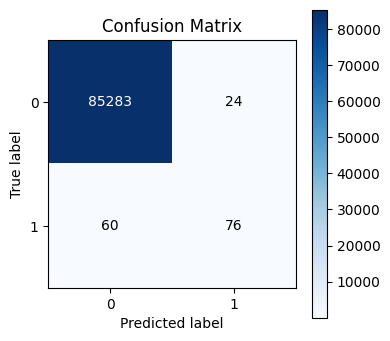

In [51]:
weights={0:2,1:1}
model = LogisticRegression(solver='lbfgs', class_weight = weights)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(
y_test,
y_pred,
figsize=(4, 4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.76      0.27      0.40       136

    accuracy                           1.00     85443
   macro avg       0.88      0.64      0.70     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

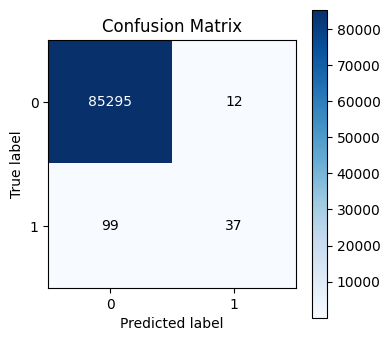

In [54]:
weights={0:10,1:1}
model = LogisticRegression(solver='lbfgs', class_weight = weights)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(
y_test,
y_pred,
figsize=(4, 4))